# Portfolio Optimization
## Monte Carlo Simulation  for Optimization Search

## 1. Library

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data manipulation

In [4]:
start=datetime.datetime(2015,1,1)
end=datetime.datetime(2020,1,1)
AAPL=web.DataReader("AAPL",'yahoo',start,end)
CSCO=web.DataReader("CSCO",'yahoo',start,end)
IBM=web.DataReader("IBM",'yahoo',start,end)
AMZN=web.DataReader("AMZN",'yahoo',start,end)

In [11]:
stocks=pd.concat([AAPL['Close'],CSCO['Close'],IBM['Close'],AMZN['Close']],axis=1)
stocks.columns=['AAPL','CSCO','IBM','AMZN']

## 3. Lognormal return


In [17]:
log_ret=np.log(stocks/stocks.shift(1))
log_ret.head()

,AAPL,CSCO,IBM,AMZN
Date,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-01-02,-0.009558,-0.007577,0.010047,-0.005914
2015-01-05,-0.028576,-0.020121,-0.015860,-0.020731
2015-01-06,0.000094,-0.000370,-0.021802,-0.023098
2015-01-07,0.013925,0.009200,-0.006557,0.010544


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d57c590>,
      dtype=object)

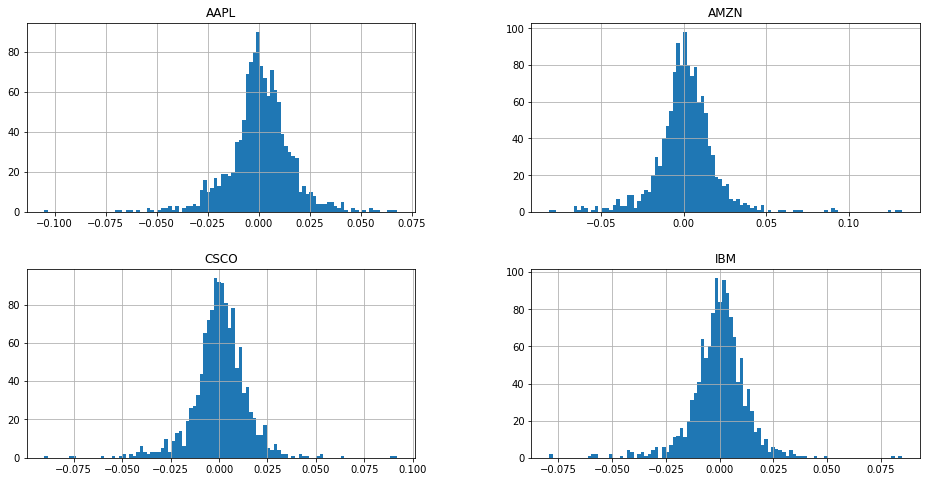

In [20]:
log_ret.hist(bins=100,figsize=(16,8))

In [25]:
log_ret.mean()

AAPL    0.000778
CSCO    0.000433
IBM    -0.000143
AMZN    0.001418
dtype: float64

## 4. Monte Carlo Simulation 

In [47]:
#Initialization
np.random.seed(101)#get the same random number every time in the same cell

num_ports=5000
all_weights=np.zeros((num_ports,len(stocks.columns)))
ret_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports)
sharpe_arr=np.zeros(num_ports)

#Monte Carlo Simulation
for index in range(num_ports):
    #Weights
    weights=np.array(np.random.random(4))
    weights=weights/np.sum(weights) #normalized random number to equal to 1
    #Save weights into 2 dimensional array
    all_weights[index,:]=weights
    #Expected Return
    ret_arr[index]=np.sum((log_ret.mean()*weights)*252)
    #Expected Volatility
    vol_arr[index]=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    #Sharpe ratio
    sharpe_arr[index]=ret_arr[index]/vol_arr[index]

#### Maximum Sharpe Ratio

In [50]:
sharpe_arr.max()
sharpe_arr.argmax()

3414

In [52]:
max_sr_ret=ret_arr[3414]
max_sr_vol=vol_arr[3414]

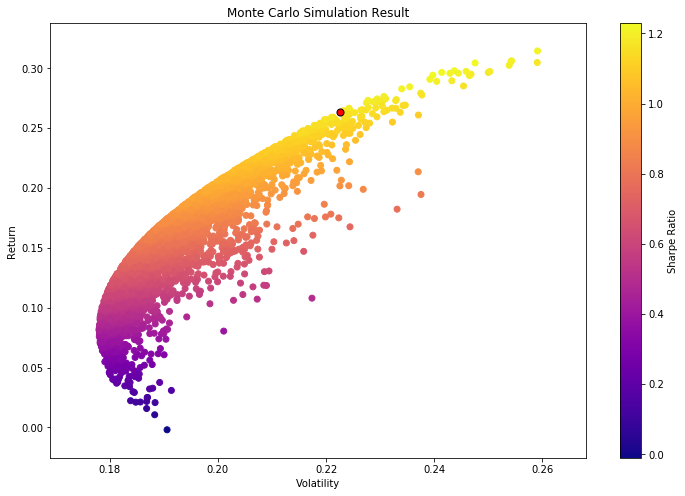

In [55]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Monte Carlo Simulation Result')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

## 5. Mathematical Optimization (Advanced)
 We can use optimization functions to find the ideal weights mathematically than just guess and check!!

In [56]:
def get_Ret_vol_sr(weights):
    weights=np.array(weights)
    ret=np.sum(log_ret)

from scipy.optimize import minimize